# IGA-04. Biasedness of the variance estimator

**Students**
- Magomedova Zamira
- Prorok Ilya
- Versotskaya Nataliya
- Vlasova Natalia


## Setup of the problem

In this IGA you are asked to design and implement a **Monte-Carlo experiment**. Specifically, you need to prove that for small samples (no more than 10 observations) it is indeed better to use the unbiased formula for variance estimation. Prove it by running simulations for the both formulas given below, and then compare the results.

$s^2_{biased}=\frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2 $

$s^2_{unbiased}=\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2 $


**Important!** In the MC-experiment, draw random variables from a **normal** distribution (with arbitrarily chosen mean (loc) and standard deviation (scale)).

As a result, provide the graphical illustration of your results of the following kind:

![VarBias1](var_bias.png)



In [1]:
# loading the necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Task 1. (2 points)
**Program your own function and use it to run the above-described MC-experiment.**

In [2]:
# provide the function code in this chunk
def var_est_N(mean=0, stdev=10, s_size=10, MCruns=500):

    biased = []
    unbiased = []

    for i in range(MCruns):

        ### STEP 1. Nature acts and generates a small sample
        d1 = np.random.normal(loc=mean, scale=stdev, size=s_size)

        ### STEP 2. Researcher acts and calculates the two estimates of variance
        biased_var = np.var(d1)
        unbiased_var = s_size/(s_size-1)*biased_var # S(unbsd) = n * S(bsd) / (n-1)

        ### STEP 3: store the results
        biased.extend([biased_var])
        unbiased.extend([unbiased_var])

    ### return the results
    return (biased, unbiased)
    

In [3]:
# use the function to obtain results of the MC-experiment
bsd, unbsd = var_est_N()

## Task 2. (1.5 points)

**Construct a histogram of the obtained results - you should reconstruct the above-given graph in details.**

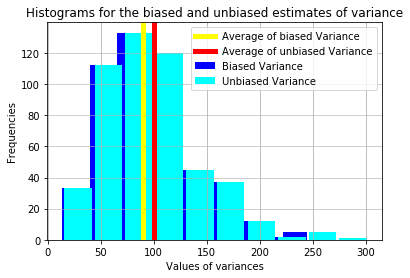

In [4]:
# construct a histogram of the simulated trials

# transform the np-array into a pandas series
bsd_pd = pd.Series(bsd)
unbsd_pd = pd.Series(unbsd)

# making a histogram
bsd_pd.plot.hist(grid=True, rwidth=0.9, color='blue', label="Biased Variance")
unbsd_pd.plot.hist(grid=True, rwidth=0.9, color='aqua', label="Unbiased Variance")

# adding a line for the 'true' mean
plt.axvline(x=np.mean(bsd), color="yellow", linewidth=5, label="Average of biased Variance")
plt.axvline(x=np.mean(unbsd), color="red", linewidth=5, label="Average of unbiased Variance")

# adding labels and lines
plt.title('Histograms for the biased and unbiased estimates of variance')
plt.xlabel('Values of variances')
plt.ylabel('Frequencies')
plt.grid(axis='y', alpha=0.75)

plt.legend()
plt.show()

## Task 3. (0.5 points)
**Explicitly calculate the averages of the two obtained distributions, compare them statistically using the t-test, and give a brief comment on the obtained results.**

In [5]:
# print out the two average values
print(np.mean(bsd))
print(np.mean(unbsd))

90.12781627239666
100.14201808044075


In [6]:
# compare the two average values with the t-test (give the test statistic and the p-value)
t_twoind, pVal_twoind = stats.ttest_ind(bsd, unbsd)

print("H0: Exp.value(bsd) = Exp.value(unbsd)") # i.e. Sd(biased) = Sd(unbiased)
print("H1: Exp.value(bsd) != Exp.value(unbsd)") 
print("Two-sample t-statistic = ", round(t_twoind,3))
print("Two-sample p-value = ", round(pVal_twoind,3))


H0: Exp.value(bsd) = Exp.value(unbsd)
H1: Exp.value(bsd) != Exp.value(unbsd)
Two-sample t-statistic =  -3.654
Two-sample p-value =  0.0


In [7]:

t_one, pVal_one = stats.ttest_1samp(bsd, 100)

print("One-sample t-statistic = ", round(t_one,3))
print("One-sample p-value = ", round(pVal_one,3))

One-sample t-statistic =  -5.385
One-sample p-value =  0.0


In [8]:
t_one, pVal_one = stats.ttest_1samp(unbsd, 100)

print("One-sample t-statistic = ", round(t_one,3))
print("One-sample p-value = ", round(pVal_one,3))

One-sample t-statistic =  0.07
One-sample p-value =  0.944


**Comments**

<br>As the obtained p-value is smaller than 5%, we reject the null hypothesis. Thus, the difference between means of two samples is statistically significant, which means that biased and unbiased variance give different results for sample of small sizes.